In [5]:
cd ThinkStats2/code

/notebooks/Statistics_SQL/ThinkStats2/code


In [6]:
import nsfg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline

In [147]:
df = nsfg.ReadFemPreg()

In [8]:
df.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [9]:
col = ['caseid', 'prglngth', 'outcome', 'pregordr', 'birthord', 'birthwgt_lb', 'birthwgt_oz', 'agepreg', 'finalwgt']

In [10]:
df.loc[:, col].head()

,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
0,1,39,1,1,1.0,8.0,13.0,33.16,6448.271112
1,1,39,1,2,2.0,7.0,14.0,39.25,6448.271112
2,2,39,1,1,1.0,9.0,2.0,14.33,12999.542264
3,2,39,1,2,2.0,7.0,0.0,17.83,12999.542264
4,2,39,1,3,3.0,6.0,3.0,18.33,12999.542264


In [11]:
data = pd.DataFrame([])
for i in range(len(col)):
    data = data.append(df[col[i]])
    
data = data.T

In [12]:
data.head()

,caseid,prglngth,outcome,pregordr,birthord,birthwgt_lb,birthwgt_oz,agepreg,finalwgt
0,1.0,39.0,1.0,1.0,1.0,8.0,13.0,33.16,6448.271112
1,1.0,39.0,1.0,2.0,2.0,7.0,14.0,39.25,6448.271112
2,2.0,39.0,1.0,1.0,1.0,9.0,2.0,14.33,12999.542264
3,2.0,39.0,1.0,2.0,2.0,7.0,0.0,17.83,12999.542264
4,2.0,39.0,1.0,3.0,3.0,6.0,3.0,18.33,12999.542264


In [13]:
df.outcome.value_counts()

1    9148
4    1921
2    1862
6     352
5     190
3     120
Name: outcome, dtype: int64

In [14]:
df.loc[df.pregordr>1, 'nbrnaliv'].value_counts()

1.0    5651
2.0     107
3.0       9
5.0       5
4.0       4
Name: nbrnaliv, dtype: int64

In [15]:
from collections import defaultdict
d = defaultdict(list)

for index, caseid in df.caseid.iteritems():
    d[caseid].append(index)

In [16]:
# Create a function that calculate histograme of a sample
def histGen(t):
    
    hist = {}
    for x in t:
        hist[x] = hist.get(x, 0) + 1
    
    return hist

In [17]:
t = np.random.randint(1, 10, 100)

In [18]:
dict_t = histGen(t)

In [19]:
dict_t

{1: 8, 2: 10, 3: 11, 4: 13, 5: 13, 6: 11, 7: 10, 8: 10, 9: 14}

In [20]:
from collections import Counter

dict_t2 = Counter(t)

In [21]:
dict_t2

Counter({1: 8, 2: 10, 3: 11, 4: 13, 5: 13, 6: 11, 7: 10, 8: 10, 9: 14})

In [22]:
live = df[df.prglngth > 27]

In [23]:
live.prglngth.mean()

38.591585760517802

In [24]:
live.prglngth.std()

2.4330443458779301

In [25]:
group1 = live[live.pregnum == 1]

In [26]:
group2 = live[live.pregnum > 1]

In [27]:
# Compute the Cohen's d statistic to evaluate the difference of prglngth
def Cohen_d(group1, group2):
    
    mean1 = group1.mean()
    mean2 = group2.mean()
    
    var1 = group1.var()
    var2 = group2.var()
    
    num1 = len(group1)
    num2 = len(group2)
    
    var = (var1 * num1 + var2 * num2)/(num1 + num2)
    
    return (mean1 - mean2) / np.sqrt(var)

In [28]:
# dataframe for first baby
first_baby = data[data.birthord==1]

In [29]:
# dataframe for later babies
later_baby = data[data.birthord>1]

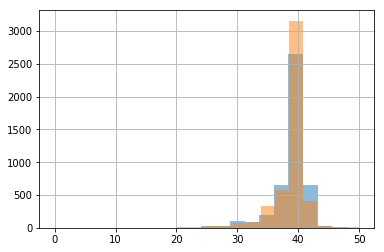

In [30]:
first_baby.prglngth.hist(bins=20, alpha=0.5)
later_baby.prglngth.hist(bins=20, alpha=0.5)

In [31]:
d = Cohen_d(first_baby.prglngth, later_baby.prglngth)

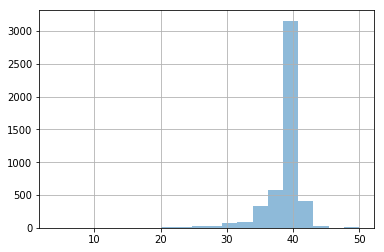

In [32]:
test = later_baby.prglngth.hist(bins=20, alpha=0.5)

In [33]:
dict_t

{1: 8, 2: 10, 3: 11, 4: 13, 5: 13, 6: 11, 7: 10, 8: 10, 9: 14}

In [375]:
# Calculate mode of the distribution
import operator
mode = max(dict_t.items(), key=operator.itemgetter(1))[0]

In [376]:
dict_preg = {}

for _, caseid in df.caseid.items():
    dict_preg[caseid] = dict_preg.get(caseid, 0) + 1

In [377]:
xs, freq = zip(*sorted(dict_preg.items()))

### Work with time series data: Trend + Seasonality + Noise

In [378]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])

In [379]:
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


In [380]:
quality_group = transactions.groupby(['quality'])
dailies = {}
for name, group in quality_group:
    dailies[name] = group[['date', 'ppg']].groupby(['date']).agg({'ppg':'mean'})
    dailies[name]['date'] = dailies[name].index
    dailies[name]['year'] = (dailies[name]['date'] - dailies[name]['date'][0])/np.timedelta64(1,'Y')

In [381]:
def daily_ppg_group(df):
    quality_group = {}
    groups = df.groupby(['quality'])
    for name, group in groups:
        quality_group[name] = daily_ppg(group)
    
    return quality_group

def daily_ppg(df, fun=np.mean):
    date_group = df[['date', 'ppg']].groupby('date', as_index=False)
    date_group_agg = date_group.aggregate(fun)
    
    date_group_agg['year'] = (date_group_agg['date'] - date_group_agg['date'][0])/np.timedelta64(1, 'Y')
    
    return date_group_agg

In [382]:
ppg_qual_time = daily_ppg_group(transactions)

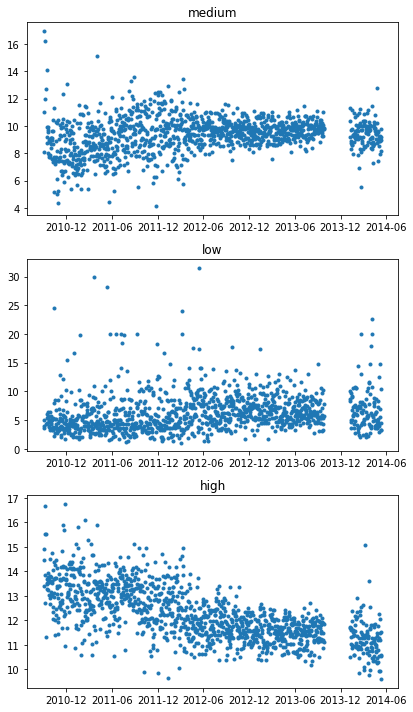

In [383]:
fig, ax = plt.subplots(3,1)
fig.set_figheight(10)
for i, (name, daily) in enumerate(ppg_qual_time.items()):
    ax[i].plot(daily['date'], daily['ppg'], '.')
    ax[i].set_title(name)
plt.tight_layout()

In [384]:
# Now we need to estimate the linear regression coefficient, signficance level, as well as the 95% confidence interval
x = np.array(ppg_qual_time['high'].year)
y = np.array(ppg_qual_time['high']['ppg'])

# Calculate the slope by definition
slope = np.dot(x - np.mean(x), y - np.mean(y))/np.dot(x - np.mean(x), x - np.mean(x))

intercept = np.mean(y) - slope * np.mean(x)

In [385]:
slope, intercept

(-0.70820651877870444, 13.44964431342092)

In [386]:
y_pred = x * slope + intercept

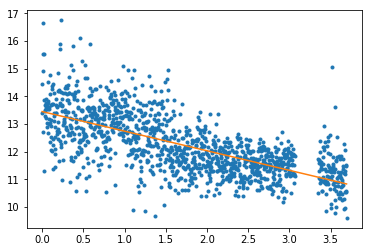

In [387]:
plt.plot(x, y, '.')
plt.plot(x, y_pred)

In [388]:
import statsmodels.formula.api as smf

model = smf.ols('ppg ~ year', data=ppg_qual_time['high'])
results = model.fit()

In [389]:
slope = results.params['year']
intercept = results.params['Intercept']
y_pred2 = ppg_qual_time['high'].year * slope + intercept
slope, intercept, results.rsquared

(-0.70820651877870522, 13.449644313420931, 0.44407762453517063)

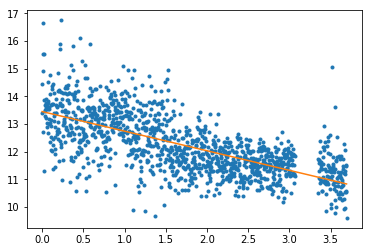

In [390]:
plt.plot(x, y, '.')
plt.plot(x, y_pred2)

In [403]:
daily = daily.set_index('date', drop=True)

In [405]:
daily.head()

,ppg,year
date,,
2010-09-02,13.384186,0.000000
2010-09-03,14.459588,0.002738
2010-09-04,14.923333,0.005476
2010-09-05,16.667500,0.008214
2010-09-06,15.537500,0.010952


In [436]:
dates = pd.date_range(daily.index.min(), daily.index.max())
reindexed = daily.reindex(dates)

In [424]:
roll_mean = pd.rolling_mean(reindexed.ppg, 30)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=30,center=False).mean()
  if __name__ == '__main__':


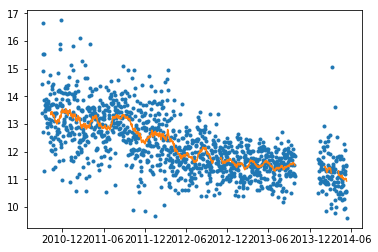

In [432]:
plt.plot(reindexed.index, reindexed.ppg, '.')
plt.plot(roll_mean.index, roll_mean)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,com=30,min_periods=0).mean()
  from ipykernel import kernelapp as app


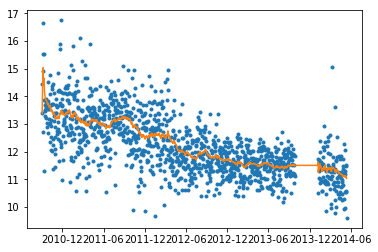

In [433]:
# Compute Exponential moving average
ewma = pd.ewma(reindexed.ppg, 30)
plt.plot(reindexed.index, reindexed.ppg, '.')
plt.plot(roll_mean.index, ewma)

### Seasonality

Deal with missing values first

In [462]:
resi = (reindexed.ppg - ewma).dropna()
fake_date = ewma + resi.values[np.random.randint(0, len(resi), len(ewma))]
reindexed.ppg.fillna(fake_date, inplace=True)

In [481]:
ewma_new = pd.ewma(reindexed.ppg, 30)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,com=30,min_periods=0).mean()
  if __name__ == '__main__':


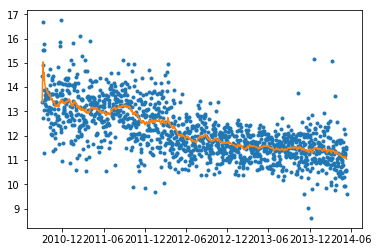

In [482]:
plt.plot(reindexed.index, reindexed.ppg, '.')
plt.plot(reindexed.index, ewma_new)

In [483]:
reindexed.residue = reindexed.ppg - ewma_new

### Auto-correlation

In [486]:
import statsmodels.tsa.stattools as smtsa

acf = smtsa.acf(reindexed.residue, nlags=40, unbiased=True)

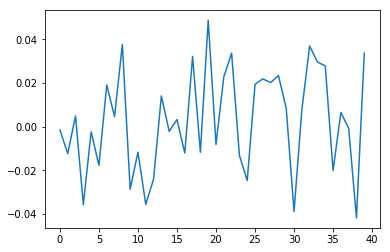

In [489]:
plt.plot(acf[1:])

### Prediction

In [497]:
years=np.arange(5)
d = dict(Intercept=np.ones(len(years)), year=years)
results.predict(pd.DataFrame(d))

0    13.449644
1    12.741438
2    12.033231
3    11.325025
4    10.616818
dtype: float64

In [477]:
def serial_correlation(series, lag=1):
    xs = series[lag:]
    ys = series.shift(lag)[lag:]
    corr = np.dot(xs - np.mean(xs), ys - np.mean(ys))/(len(xs) * np.std(xs) * np.std(ys))
    
    return corr

In [479]:
serial_correlation(transactions[transactions.quality == 'high'].price, 0)

0.0073966317943201703

In [372]:
age_weight = df[['agepreg', 'totalwgt_lb']]
age_weight.dropna(axis=0, how='any', inplace=True)

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [336]:
# Prepare to use moving average for regressing
# deal with missing values
dates = pd.date_range(daily.index.min(), daily.index.max())
reindexed = daily.reindex(dates)

In [335]:
dates

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='D')

In [175]:
x = np.array(age_weight.agepreg)
y = np.array(age_weight.totalwgt_lb)

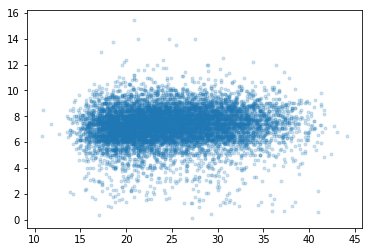

In [176]:
plt.plot(x, y, '.', alpha=0.2)

In [177]:
slope = np.dot(x - np.nanmean(x), y - np.nanmean(y))/np.dot(x - np.nanmean(x), x - np.nanmean(x))

In [178]:
slope

0.017453851471802746

In [179]:
intercept = np.mean(y - x * slope)
y_pred = x * slope + intercept

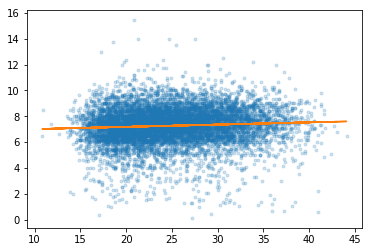

In [180]:
plt.plot(x, y, '.', alpha=0.2)
plt.plot(x, y_pred)

In [261]:
# Use resampling to estimate standard deviation

def slope_est(x, y):
    slope = np.dot(x - np.nanmean(x), y - np.nanmean(y))/np.dot(x - np.nanmean(x), x - np.nanmean(x))
    intercept = np.mean(y - x * slope)
    
    return slope, intercept

def bootstrap(x, y, iterations=1000):
    track = []
    for _ in range(1000):
        index = np.random.randint(0,len(x),len(x))
        track.append(slope_est(x[index], y[index]))
    
    slope_track, intercept_track = zip(*track)
    
    return track, slope_track, intercept_track

In [262]:
track,slope_track, intercept_track = bootstrap(x, y)

In [263]:
slope_mean = np.mean(slope_track)
slope_ste = np.std(slope_track)

In [264]:
import scipy

In [265]:
t_score = scipy.stats.norm.ppf(0.95)

In [266]:
CI_slope = [slope_mean - t_score*slope_ste, slope_mean + t_score*slope_ste]

In [267]:
CI_slope

[0.013005484276489811, 0.021809526776264365]

In [255]:
intercept_mean = np.mean(intercept_track)
intercept_ste = np.std(intercept_track)
CI_intercept = [intercept_mean - t_score*intercept_ste, intercept_mean + t_score*intercept_ste]

In [256]:
CI_intercept

[6.7138825875812467, 6.9468116099069048]

In [271]:
residue = y - (slope * x + intercept)
resi_ss = np.dot(residue-np.mean(residue), residue - np.mean(residue))
tt_ss = np.dot(y-np.mean(y), y - np.mean(y))

In [273]:
R2 = 1 - resi_ss/tt_ss

In [274]:
R2

0.0047381154747105914

### Survival Analysis

Survival Curve: Map duration t to probability of surviving longer than t: S(t) = 1-CDF(t)

In [500]:
preg = nsfg.ReadFemPreg()

In [503]:
preg.head()

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


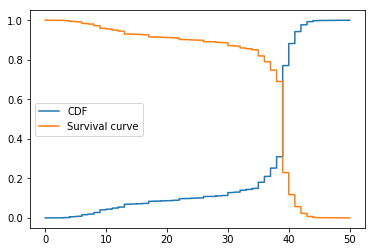

In [552]:
prg_len = preg.prglngth.values
prg_len = np.sort(prg_len)
CDF = np.cumsum(prg_len)/np.sum(prg_len)
ss = 1-np.cumsum(prg_len)/np.sum(prg_len)
plt.plot(prg_len, CDF, label = 'CDF')
plt.plot(prg_len, ss, label = 'Survival curve')
plt.legend()

### Hazard function:

$$\lambda(t) = \frac{S(t)-S(t+1)}{S(t)}$$

The fraction of events that continue until t but ends at t.

In [545]:
ss[39]

0.99989786207893017

In [540]:
hazard = np.ones(len(prg_len))
for i, _ in enumerate(CDF[:-1]):
    hazard[i] = (ss[i] - ss[i+1])/ss[i]

(0, 0.7)

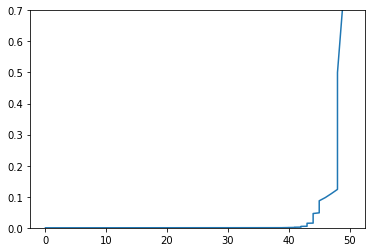

In [541]:
plt.plot(prg_len, hazard)
plt.ylim([0,0.7])

### Kaplan Meier method

Use data to estimate hazard function, and then convert hazard function to a survival curve.
$$ss(t)=[1-\lambda(0)] [1-\lambda(1)]...[1-\lambda(t)]$$